In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
train = pd.read_csv("Google_Stock_Price_Train.csv")
test = pd.read_csv("Google_Stock_Price_Test.csv")

In [12]:
train.describe()

,Open,High,Low
count,1509.000000,1509.000000,1509.000000
mean,598.150026,602.587780,593.266736
std,202.607234,203.793158,201.418625
min,279.120000,281.210000,277.220000
25%,436.860000,438.780000,434.180000
50%,563.710000,568.930000,558.470000
75%,752.920000,758.130000,746.060000
max,1075.199951,1078.489990,1063.550049


In [13]:
train.shape

(1509, 6)

In [14]:
train.dtypes

Date       object
Open      float64
High      float64
Low       float64
Close      object
Volume     object
dtype: object

In [15]:
test.dtypes

Date       object
Open      float64
High      float64
Low       float64
Close     float64
Volume      int64
dtype: object

In [16]:
train['Close'] = train['Close'].str.replace(',','')
train['Close'] = train['Close'].astype(np.float64)
train.dtypes

Date       object
Open      float64
High      float64
Low       float64
Close     float64
Volume     object
dtype: object

In [20]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

train['Close'] = scaler.fit_transform(train['Close'].values.reshape(-1,1))
test['Close'] = scaler.fit_transform(test['Close'].values.reshape(-1,1))

In [21]:
train['Close']

0       0.237573
1       0.241514
2       0.228781
3       0.216419
4       0.178548
          ...   
1504    0.784036
1505    0.779378
1506    0.769221
1507    0.767526
1508    0.765128
Name: Close, Length: 1509, dtype: float64

In [22]:
def create_sequences(data,time_step=6):
    X = []
    y = []
    for i in range(len(data)-time_step):
        X.append(data[i:i+time_step])
        y.append(data[i+time_step])
    return np.array(X),np.array(y)

In [23]:
X_train,y_train = create_sequences(train['Close'])
X_test,y_test = create_sequences(test['Close'])

In [24]:
X_train.shape,y_train.shape

((1503, 6), (1503,))

In [40]:
X_train

array([[0.23757287, 0.24151427, 0.22878051, 0.21641884, 0.1785483 ,
        0.17947163],
       [0.24151427, 0.22878051, 0.21641884, 0.1785483 , 0.17947163,
        0.18335791],
       [0.22878051, 0.21641884, 0.1785483 , 0.17947163, 0.18335791,
        0.18841558],
       ...,
       [0.80749144, 0.79858889, 0.79069216, 0.78887312, 0.78403593,
        0.77937791],
       [0.79858889, 0.79069216, 0.78887312, 0.78403593, 0.77937791,
        0.76922122],
       [0.79069216, 0.78887312, 0.78403593, 0.77937791, 0.76922122,
        0.76752617]])

In [25]:
X_test.shape,y_test.shape

((119, 6), (119,))

In [26]:
from keras.models import Sequential
from keras.layers import Dense,LSTM

model = Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))

model.compile(optimizer='adam',loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 6, 50)             10400     
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 30651 (119.73 KB)
Trainable params: 30651 (119.73 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [28]:
history = model.fit(X_train,y_train,epochs=10,batch_size=4,validation_split=0.05)

Epoch 1/10
357/357 [==============================] - 4s 11ms/step - loss: 8.4670e-04 - val_loss: 1.8481e-04
Epoch 2/10
357/357 [==============================] - 4s 11ms/step - loss: 9.1157e-04 - val_loss: 0.0034
Epoch 3/10
357/357 [==============================] - 4s 12ms/step - loss: 8.7574e-04 - val_loss: 1.8736e-04
Epoch 4/10
357/357 [==============================] - 4s 11ms/step - loss: 9.2358e-04 - val_loss: 2.6648e-04
Epoch 5/10
357/357 [==============================] - 5s 13ms/step - loss: 7.7160e-04 - val_loss: 4.6635e-04
Epoch 6/10
357/357 [==============================] - 5s 14ms/step - loss: 7.7334e-04 - val_loss: 2.4298e-04
Epoch 7/10
357/357 [==============================] - 5s 13ms/step - loss: 8.7003e-04 - val_loss: 2.3323e-04
Epoch 8/10
357/357 [==============================] - 5s 13ms/step - loss: 7.8682e-04 - val_loss: 2.2817e-04
Epoch 9/10
357/357 [==============================] - 5s 13ms/step - loss: 8.2139e-04 - val_loss: 2.1604e-04
Epoch 10/10
357/357 [==

In [30]:
y_pred = model.predict(X_test)
y_pred

4/4 [==============================] - 2s 7ms/step


array([[0.5968652 ],
       [0.57535285],
       [0.5954453 ],
       [0.7003416 ],
       [0.68610257],
       [0.75388366],
       [0.7286768 ],
       [0.7842442 ],
       [0.9016767 ],
       [0.97778755],
       [0.9133098 ],
       [0.9724422 ],
       [0.9983214 ],
       [0.9887109 ],
       [0.9029271 ],
       [0.9733828 ],
       [0.9403978 ],
       [0.5631012 ],
       [0.30192822],
       [0.4513356 ],
       [0.28232455],
       [0.05146626],
       [0.17412107],
       [0.27331656],
       [0.28810364],
       [0.37799233],
       [0.49514198],
       [0.53139657],
       [0.5766655 ],
       [0.6291156 ],
       [0.5969221 ],
       [0.7283107 ],
       [0.82670695],
       [0.6401169 ],
       [0.58245665],
       [0.38191456],
       [0.44447833],
       [0.51541716],
       [0.5377955 ],
       [0.62340415],
       [0.7197035 ],
       [0.93864983],
       [0.9276591 ],
       [0.74100584],
       [0.8603284 ],
       [0.8416009 ],
       [0.7512136 ],
       [0.535

In [31]:
y_pred = scaler.inverse_transform(y_pred)
y_pred

array([[1105.5656 ],
       [1101.8154 ],
       [1105.318  ],
       [1123.6035 ],
       [1121.1213 ],
       [1132.937  ],
       [1128.543  ],
       [1138.2294 ],
       [1158.7002 ],
       [1171.9679 ],
       [1160.7281 ],
       [1171.0361 ],
       [1175.5474 ],
       [1173.8721 ],
       [1158.9182 ],
       [1171.2001 ],
       [1165.4501 ],
       [1099.6798 ],
       [1054.1521 ],
       [1080.1968 ],
       [1050.7347 ],
       [1010.49164],
       [1031.8728 ],
       [1049.1646 ],
       [1051.7422 ],
       [1067.4116 ],
       [1087.8331 ],
       [1094.153  ],
       [1102.0443 ],
       [1111.1874 ],
       [1105.5754 ],
       [1128.4791 ],
       [1145.6315 ],
       [1113.1051 ],
       [1103.0538 ],
       [1068.0953 ],
       [1079.0015 ],
       [1091.3676 ],
       [1095.2686 ],
       [1110.1918 ],
       [1126.9788 ],
       [1165.1454 ],
       [1163.2295 ],
       [1130.6921 ],
       [1151.4924 ],
       [1148.2278 ],
       [1132.4716 ],
       [1094.

In [33]:
y_test = scaler.inverse_transform(y_test.reshape(-1,1))
y_test

array([[1102.609985],
       [1105.52002 ],
       [1122.26001 ],
       [1121.76001 ],
       [1131.97998 ],
       [1129.790039],
       [1137.51001 ],
       [1155.810059],
       [1169.969971],
       [1164.23999 ],
       [1170.369995],
       [1175.839966],
       [1175.579956],
       [1163.689941],
       [1169.939941],
       [1167.699951],
       [1111.900024],
       [1055.800049],
       [1080.599976],
       [1048.579956],
       [1001.52002 ],
       [1037.780029],
       [1051.939941],
       [1052.099976],
       [1069.699951],
       [1089.52002 ],
       [1094.800049],
       [1102.459961],
       [1111.339966],
       [1106.630005],
       [1126.790039],
       [1143.75    ],
       [1118.290039],
       [1104.72998 ],
       [1069.52002 ],
       [1078.920044],
       [1090.930054],
       [1095.060059],
       [1109.640015],
       [1126.      ],
       [1160.040039],
       [1164.5     ],
       [1138.170044],
       [1149.48999 ],
       [1149.579956],
       [11

In [34]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
print(mse,mae)

332.8501679124329 13.874632785287552


In [35]:
df_pred = pd.DataFrame({'actual':y_test[:,0],'pred':y_pred[:,0]})
df_pred

,actual,pred
0,1102.609985,1105.565552
1,1105.520020,1101.815430
2,1122.260010,1105.317993
3,1121.760010,1123.603516
4,1131.979980,1121.121338
...,...,...
114,1124.810059,1154.583740
115,1118.459961,1117.747192
116,1103.979980,1117.978027
117,1114.219971,1102.365967


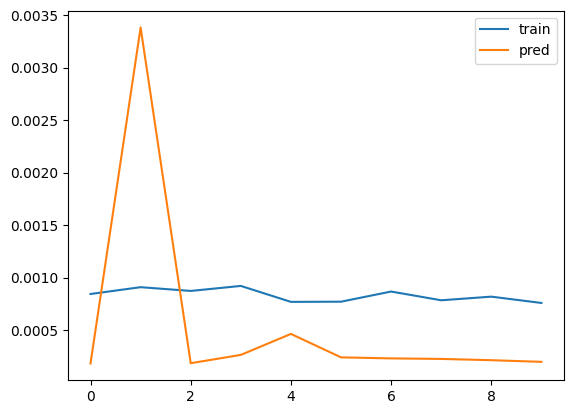

In [36]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='pred')
plt.legend()
plt.show()

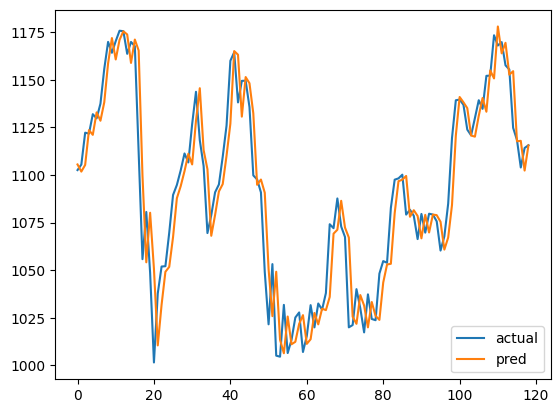

In [37]:
plt.plot(df_pred['actual'],label='actual')
plt.plot(df_pred['pred'],label='pred')
plt.legend()
plt.show()


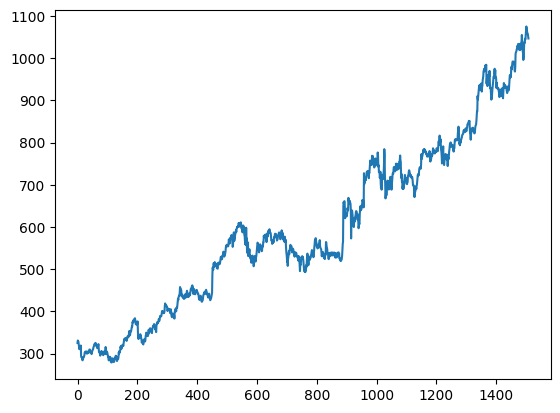

In [39]:
plt.plot(train['Open'])
plt.show()
